### Basic EDA

In [1]:
import numpy as np
import pandas as pd

C:\Users\kshit\AppData\Local\Temp\ipykernel_42336\1662815981.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('neurips_arxiv.csv')

In [101]:
df.query('authors.str.contains("NA")', engine='python')

authors  \
127   P.A. Evans (1), A.P. Beardmore (1), K.L. Page ...   
138   B. Lanzoni (1,2), E. Dalessandro (1,2), F.R. F...   
225   F. Tombesi (1,2), B. De Marco (3), K. Iwasawa ...   
309   Xiang Liu, Lang Cui, Wen-Feng Luo, Wei-Zhao Sh...   
512   John Southworth (1), B. T. Gaensicke (1), T. R...   
...                                                 ...   
4551                                                 NA   
4552                                                 NA   
4553                                                 NA   
4554                                                 NA   
4555                                                 NA   

                                                  title categories  \
127   An online repository of Swift/XRT light curves...   astro-ph   
138   The Blue Straggler Population of the Globular ...   astro-ph   
225   Correlated modulation between the redshifted F...   astro-ph   
309   VLBI observations of nineteen GHz-Peaked-Spect...   astro-ph   
512   SDSS J233325.92+152222.1 and the evolution of ...   astro-ph   
...                                                 ...        ...   
4551                                  Zipfian Whitening         cs   
4552  Zipper: Addressing Degeneracy in Algorithm-Agn...         cs   
4553  ZOPP: A Framework of Zero-shot Offboard Panopt...         cs   
4554  ZSC-Eval: An Evaluation Toolkit and Benchmark ...         cs   
4555  μBench: A Microscopy Benchmark for Vision-Lang...         cs   

                                               abstract  year  
127     Context. Swift data are revolutionising our ...  2009  
138     By combining high-resolution HST and wide-fi...  2009  
225     It has been suggested that X-ray observation...  2009  
309     Aims and Methods: We present the results of ...  2007  
512     Intermediate polars (IPs) are cataclysmic va...  2008  
...                                                 ...   ...  
4551  It has become clear that the word embedding sp...  2024  
4552  The widespread use of black box prediction met...  2024  
4553  Offboard perception aims to automatically gene...  2024  
4554  Zero-shot coordination (ZSC) is a new cooperat...  2024  
4555  Recent advances in microscopy have enabled the...  2024  

[34860 rows x 5 columns]

In [102]:
!pip install wordcloud


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [272]:
df = pd.read_csv('neurips_arxiv.csv')

In [273]:
df.head()

Unnamed: 0                                            authors  \
0           0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1           1                    Ileana Streinu and Louis Theran   
2           2                                        Hongjun Pan   
3           3                                       David Callan   
4           5                           Y. H. Pong and C. K. Law   

                                               title         categories  \
0  Calculation of prompt diphoton production cros...             hep-ph   
1           Sparsity-certifying Graph Decompositions      math.CO cs.CG   
2  The evolution of the Earth-Moon system based o...     physics.gen-ph   
3  A determinant of Stirling cycle numbers counts...            math.CO   
4  Bosonic characters of atomic Cooper pairs acro...  cond-mat.mes-hall   

                                            abstract  year  
0    A fully differential calculation in perturba...  2008  
1    We describe a new algorithm, the $(k,\ell)$-...  2008  
2    The evolution of Earth-Moon system is descri...  2008  
3    We show that a determinant of Stirling cycle...  2007  
4    We study the two-particle wave function of p...  2015

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#### Plotting the distribution of papers by year

C:\Users\kshit\AppData\Local\Temp\ipykernel_39808\235995990.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='viridis')


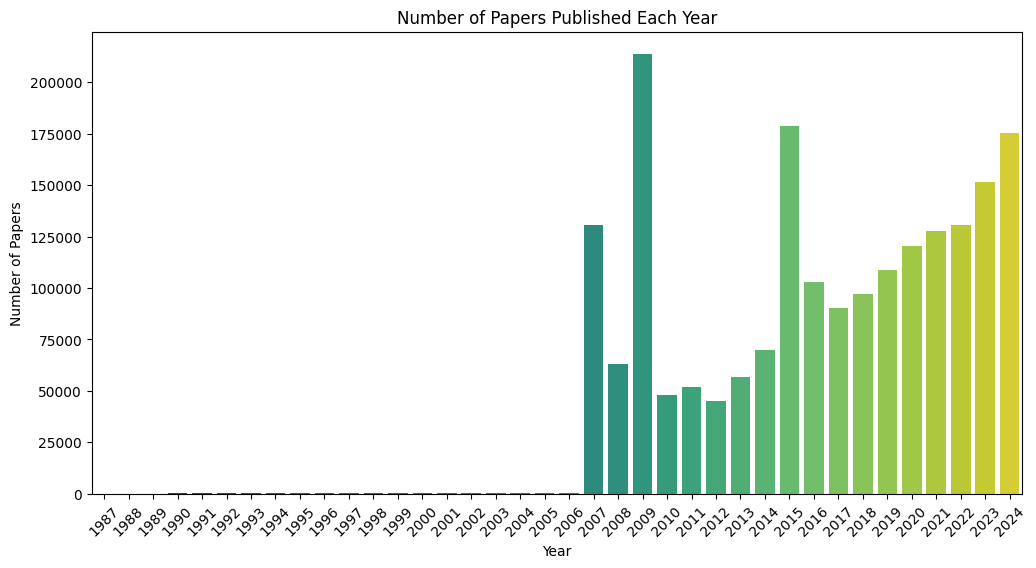

In [104]:

plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Number of Papers Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()


#### Plotting the top 10 categories

C:\Users\kshit\AppData\Local\Temp\ipykernel_39808\4260913898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')


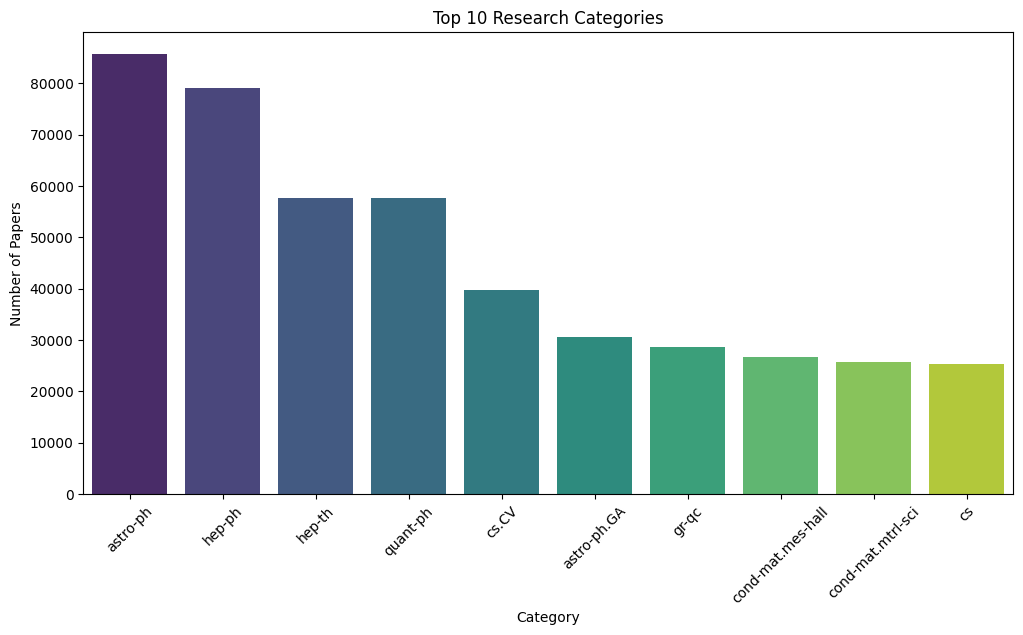

In [247]:

plt.figure(figsize=(12, 6))
top_categories = df['categories'].explode().value_counts().head(10)
sns.barplot(x=top_categories.index, y=top_categories.values, palette='viridis')
plt.title('Top 10 Research Categories')
plt.xlabel('Category')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()

#### Plotting the distribution of abstract lengths

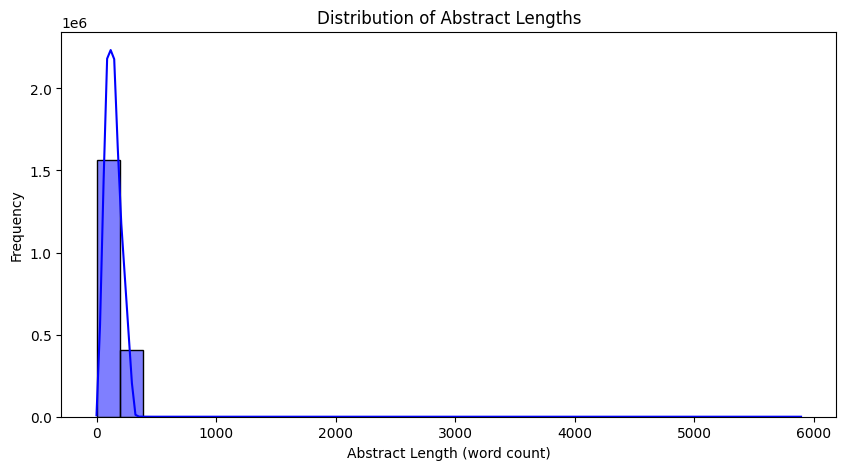

In [235]:
df['abstract'] = df['abstract'].fillna('')

df['abstract_length'] = df['abstract'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['abstract_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Abstract Lengths')
plt.xlabel('Abstract Length (word count)')
plt.ylabel('Frequency')
plt.show()

#### Generating a word cloud to understand what words are the most occuring ones

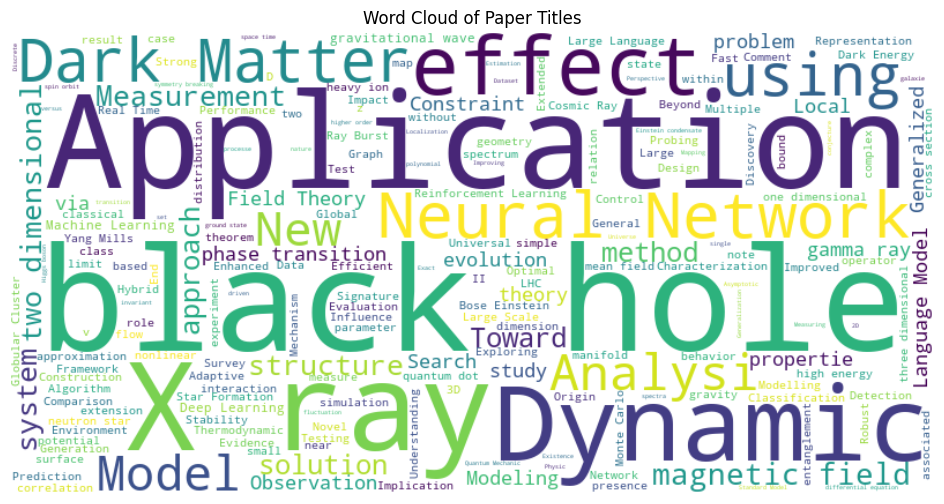

In [236]:
from wordcloud import WordCloud

# I am combining all titles into a single string
title_text = ' '.join(df['title'].astype(str))

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(title_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles')
plt.show()


#### Analysing the top keywords in paper titles

C:\Users\kshit\AppData\Local\Temp\ipykernel_39808\2807029664.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_word_counts['word'], y=title_word_counts['count'], palette='viridis')


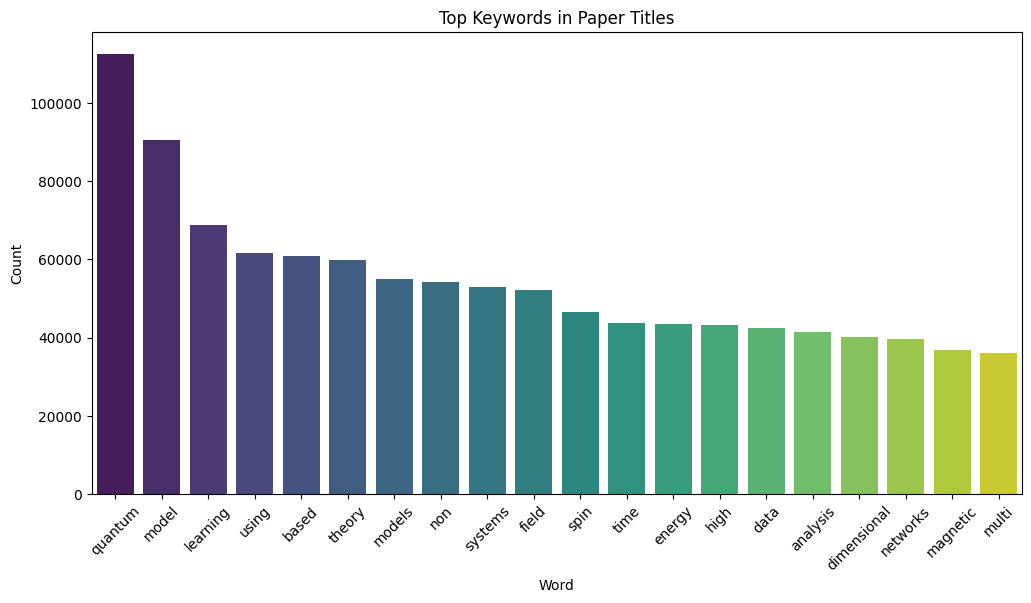

In [237]:
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer to extract keywords
vectorizer = CountVectorizer(stop_words='english', max_features=20)
title_words = vectorizer.fit_transform(df['title'])

title_word_counts = pd.DataFrame({'word': vectorizer.get_feature_names_out(),
                                  'count': title_words.toarray().sum(axis=0)})

title_word_counts = title_word_counts.sort_values(by='count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=title_word_counts['word'], y=title_word_counts['count'], palette='viridis')
plt.title('Top Keywords in Paper Titles')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [248]:
df.head()

Unnamed: 0                                            authors  \
0           0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1           1                    Ileana Streinu and Louis Theran   
2           2                                        Hongjun Pan   
3           3                                       David Callan   
4           5                           Y. H. Pong and C. K. Law   

                                               title         categories  \
0  Calculation of prompt diphoton production cros...             hep-ph   
1           Sparsity-certifying Graph Decompositions      math.CO cs.CG   
2  The evolution of the Earth-Moon system based o...     physics.gen-ph   
3  A determinant of Stirling cycle numbers counts...            math.CO   
4  Bosonic characters of atomic Cooper pairs acro...  cond-mat.mes-hall   

                                            abstract  year  
0    A fully differential calculation in perturba...  2008  
1    We describe a new algorithm, the $(k,\ell)$-...  2008  
2    The evolution of Earth-Moon system is descri...  2008  
3    We show that a determinant of Stirling cycle...  2007  
4    We study the two-particle wave function of p...  2015

In [250]:
# Getting the top 5 categories
top_categories = df['categories'].explode().value_counts().head(5).index
print(top_categories)

Index(['astro-ph', 'hep-ph', 'hep-th', 'quant-ph', 'cs.CV'], dtype='object', name='categories')


#### Plotting the top 5 categories over time

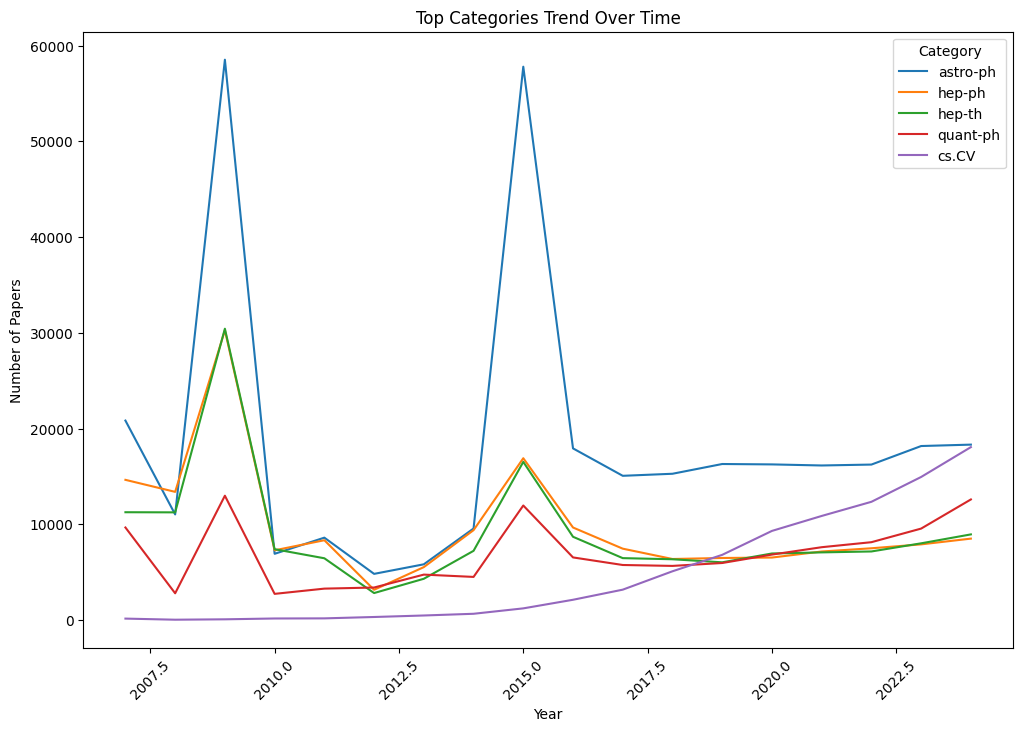

In [251]:

top_categories = df['categories'].explode().value_counts().head(5).index

plt.figure(figsize=(12, 8))
for category in top_categories:
    yearly_counts = df[df['categories'].apply(lambda x: category in x)].groupby('year').size()
    plt.plot(yearly_counts.index, yearly_counts.values, label=category)

plt.title('Top Categories Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()


### Hypothesis 1: How is the research paper trending over time? Is it growing, declining or remaining stable over time?

In [274]:
df.head()

Unnamed: 0                                            authors  \
0           0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1           1                    Ileana Streinu and Louis Theran   
2           2                                        Hongjun Pan   
3           3                                       David Callan   
4           5                           Y. H. Pong and C. K. Law   

                                               title         categories  \
0  Calculation of prompt diphoton production cros...             hep-ph   
1           Sparsity-certifying Graph Decompositions      math.CO cs.CG   
2  The evolution of the Earth-Moon system based o...     physics.gen-ph   
3  A determinant of Stirling cycle numbers counts...            math.CO   
4  Bosonic characters of atomic Cooper pairs acro...  cond-mat.mes-hall   

                                            abstract  year  
0    A fully differential calculation in perturba...  2008  
1    We describe a new algorithm, the $(k,\ell)$-...  2008  
2    The evolution of Earth-Moon system is descri...  2008  
3    We show that a determinant of Stirling cycle...  2007  
4    We study the two-particle wave function of p...  2015

#### Finding the simplified category and count occurrences

In [276]:
df['simplified_category'] = df['categories'].str.split('-').str[0].str.split('.').str[0]


grouped_data = df.groupby('simplified_category').size().reset_index(name='count')

In [278]:
df.head()

Unnamed: 0                                            authors  \
0           0  C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...   
1           1                    Ileana Streinu and Louis Theran   
2           2                                        Hongjun Pan   
3           3                                       David Callan   
4           5                           Y. H. Pong and C. K. Law   

                                               title         categories  \
0  Calculation of prompt diphoton production cros...             hep-ph   
1           Sparsity-certifying Graph Decompositions      math.CO cs.CG   
2  The evolution of the Earth-Moon system based o...     physics.gen-ph   
3  A determinant of Stirling cycle numbers counts...            math.CO   
4  Bosonic characters of atomic Cooper pairs acro...  cond-mat.mes-hall   

                                            abstract  year simplified_category  
0    A fully differential calculation in perturba...  2008                 hep  
1    We describe a new algorithm, the $(k,\ell)$-...  2008                math  
2    The evolution of Earth-Moon system is descri...  2008             physics  
3    We show that a determinant of Stirling cycle...  2007                math  
4    We study the two-particle wave function of p...  2015                cond

#### I am trying to cluster the data, and then gain some insights from it.

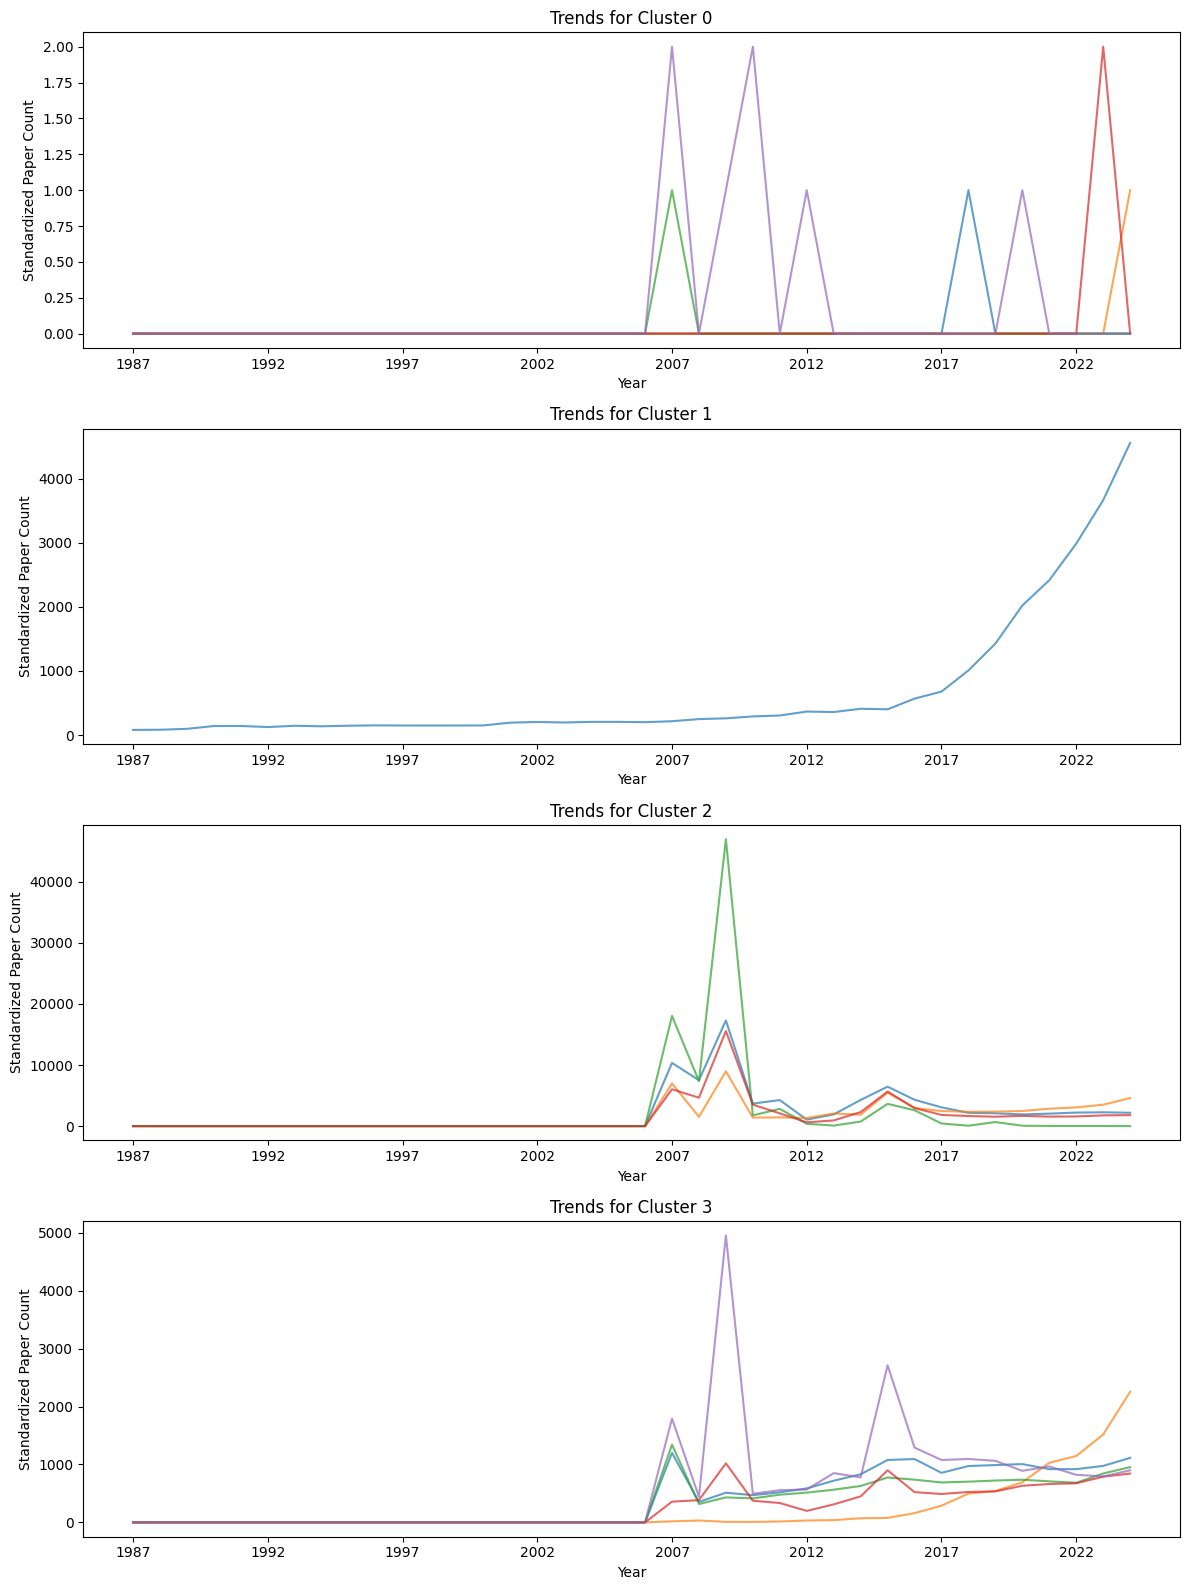

In [114]:

num_clusters = category_trends['Cluster'].nunique()
fig, axes = plt.subplots(num_clusters, 1, figsize=(12, num_clusters * 4))

# Loop through each cluster and create a separate plot
for cluster in range(num_clusters):
    ax = axes[cluster]
    cluster_data = category_trends[category_trends['Cluster'] == cluster].drop(columns='Cluster').T

    # Sample a few categories from each cluster for readability (e.g., 5 categories)
    sample_categories = cluster_data.sample(n=min(5, cluster_data.shape[1]), axis=1, random_state=42)
    sample_categories.plot(ax=ax, alpha=0.7, legend=False)

    ax.set_title(f'Trends for Cluster {cluster}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Standardized Paper Count')

plt.tight_layout()
plt.show()


#### Understanding cluster composition

In [115]:

cluster_counts = category_trends['Cluster'].value_counts()
print("Number of categories in each cluster:\n", cluster_counts)

Number of categories in each cluster:
 Cluster
0    70160
3       32
2        4
1        1
Name: count, dtype: int64


#### Getting a summary of categories within each cluster

In [116]:

for cluster in range(num_clusters):
    print(f"\nTop Categories in Cluster {cluster}:")
    
    # Filter categories in the current cluster
    cluster_categories = category_trends[category_trends['Cluster'] == cluster].index
    
    # Display the categories for this cluster
    print(cluster_categories.tolist())



Top Categories in Cluster 0:
['acc-phys hep-ex physics.acc-ph', 'acc-phys physics.acc-ph', 'adap-org astro-ph cond-mat nlin.AO', 'adap-org bayes-an nlin.AO', 'adap-org chao-dyn cond-mat.stat-mech math.DS nlin.AO nlin.CD physics.bio-ph physics.chem-ph q-bio.PE', 'adap-org chao-dyn nlin.AO nlin.CD', 'adap-org chao-dyn nlin.AO nlin.CD physics.med-ph q-bio', 'adap-org comp-gas nlin.AO nlin.CG', 'adap-org cond-mat hep-lat nlin.AO', 'adap-org cond-mat nlin.AO', 'adap-org cond-mat nlin.AO nlin.CD', 'adap-org cond-mat nlin.AO nlin.PS patt-sol', 'adap-org cond-mat nlin.AO nlin.SI solv-int', 'adap-org cond-mat nlin.AO physics.optics', 'adap-org cond-mat nlin.AO q-bio', 'adap-org cond-mat.dis-nn cond-mat.stat-mech nlin.AO physics.bio-ph q-bio.NC', 'adap-org cond-mat.dis-nn math.DS nlin.AO nlin.PS patt-sol physics.bio-ph', 'adap-org cond-mat.dis-nn nlin.AO', 'adap-org cond-mat.soft nlin.AO', 'adap-org cond-mat.soft nlin.AO physics.bio-ph q-bio', 'adap-org cond-mat.soft nlin.AO q-bio.CB q-bio.MN',

#### Clearly, these small number of clusters do not provide very intuitive results, and I do not possess the computing resources to cluster this dataset into huge number of clusters. So, I am trying an alternative approach, where I will be doing a classification to solve this problem

In [513]:
data_count = None

In [514]:
data_count = (
    df.groupby(['year', 'simplified_category'])
    .size()
    .reset_index(name='paper_count')
)

#### Sorting by category and year to ensure sequential order, Calculating the growth rate (percentage change) year over year. Then I calculate the volatility which is nothing, but the standard deviation of the growth rate within each simplified category. I then merge the volatility back to the main dataframe

In [515]:

data_count = data_count.sort_values(['simplified_category', 'year']).reset_index(drop=True)

data_count['growth_rate'] = data_count.groupby('simplified_category')['paper_count'].pct_change() * 100

volatility_df = data_count.groupby('simplified_category')['growth_rate'].std().reset_index()
volatility_df.columns = ['simplified_category', 'volatility']

# Merging volatility back into the main dataframe
data_count = data_count.merge(volatility_df, on='simplified_category', how='left')


#### I am creating lagged features for the model by grouping with simplified category for both - growth_rate and volatility

In [516]:

data_count['growth_rate_last_year'] = data_count.groupby('simplified_category')['growth_rate'].shift(1)
data_count['volatility_last_year'] = data_count.groupby('simplified_category')['volatility'].shift(1)

# Dropping rows with NaN values from lagging
data_count = data_count.dropna().reset_index(drop=True)

In [517]:
data_count.head(30)

year simplified_category  paper_count  growth_rate  volatility  \
0   2010                 acc            1   -87.500000  127.658971   
1   2011                 acc            1     0.000000  127.658971   
2   2012                 acc            4   300.000000  127.658971   
3   2014                 acc            1   -75.000000  127.658971   
4   2015                 acc            1     0.000000  127.658971   
5   2016                 acc            1     0.000000  127.658971   
6   2019                 acc            2   100.000000  127.658971   
7   2009                adap           99    20.731707  276.669808   
8   2011                adap            1   -98.989899  276.669808   
9   2012                adap            5   400.000000  276.669808   
10  2015                adap           41   720.000000  276.669808   
11  2016                adap            3   -92.682927  276.669808   
12  2017                adap            1   -66.666667  276.669808   
13  2019                adap            3   200.000000  276.669808   
14  2023                adap            2   -33.333333  276.669808   
15  2009                 alg           50   -94.444444  277.709274   
16  2010                 alg           11   -78.000000  277.709274   
17  2011                 alg            4   -63.636364  277.709274   
18  2012                 alg            7    75.000000  277.709274   
19  2013                 alg            4   -42.857143  277.709274   
20  2014                 alg           11   175.000000  277.709274   
21  2015                 alg           61   454.545455  277.709274   
22  2016                 alg           43   -29.508197  277.709274   
23  2017                 alg            2   -95.348837  277.709274   
24  2018                 alg            1   -50.000000  277.709274   
25  2019                 alg            2   100.000000  277.709274   
26  2021                 alg            3    50.000000  277.709274   
27  2023                 alg            1   -66.666667  277.709274   
28  2024                 alg            1     0.000000  277.709274   
29  2016                  ao            4   300.000000  219.664633   

    growth_rate_last_year  volatility_last_year  
0              -66.666667            127.658971  
1              -87.500000            127.658971  
2                0.000000            127.658971  
3              300.000000            127.658971  
4              -75.000000            127.658971  
5                0.000000            127.658971  
6                0.000000            127.658971  
7               41.379310            276.669808  
8               20.731707            276.669808  
9              -98.989899            276.669808  
10             400.000000            276.669808  
11             720.000000            276.669808  
12             -92.682927            276.669808  
13             -66.666667            276.669808  
14             200.000000            276.669808  
15             946.511628            277.709274  
16             -94.444444            277.709274  
17             -78.000000            277.709274  
18             -63.636364            277.709274  
19              75.000000            277.709274  
20             -42.857143            277.709274  
21             175.000000            277.709274  
22             454.545455            277.709274  
23             -29.508197            277.709274  
24             -95.348837            277.709274  
25             -50.000000            277.709274  
26             100.000000            277.709274  
27              50.000000            277.709274  
28             -66.666667            277.709274  
29             -85.714286            219.664633

In [527]:
# Split data: training up to 2022, test for 2022 and beyond
train_data = data_count[data_count['year'] <= 2022]
test_data = data_count[data_count['year'] > 2022]

X_train = train_data[['paper_count', 'growth_rate_last_year']]
y_train = train_data['growth_rate']
X_test = test_data[['paper_count', 'growth_rate_last_year']]

#### Using GridSearchCV to find the best parameters, for the given set of parameters for RandomForestRegressor. 

In [528]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)




Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


C:\Users\kshit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [529]:
model = RandomForestRegressor(random_state=42, max_depth=None, min_samples_split=2, n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

test_data['predicted_growth_rate'] = y_pred


C:\Users\kshit\AppData\Local\Temp\ipykernel_39808\2232808002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_growth_rate'] = y_pred


#### Here, I define the thresholds for classification. I am defining growing_threshold = 3 and declining_threshold = -3

In [530]:

growing_threshold = 3
declining_threshold = -3

# Classify predictions
def classify_growth(rate):
    if rate >= growing_threshold:
        return "Growing"
    elif rate <= declining_threshold:
        return "Declining"
    else:
        return "Stable"

# Apply classification
test_data['predicted_growth_class'] = test_data['predicted_growth_rate'].apply(classify_growth)


C:\Users\kshit\AppData\Local\Temp\ipykernel_39808\2715329069.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_growth_class'] = test_data['predicted_growth_rate'].apply(classify_growth)


#### Displaying the predictions

In [531]:

print(test_data[['year', 'simplified_category', 'predicted_growth_rate', 'predicted_growth_class']])


     year simplified_category  predicted_growth_rate predicted_growth_class
14   2023                adap              30.866549                Growing
27   2023                 alg             -90.334796              Declining
28   2024                 alg             -33.250000              Declining
45   2023               astro              10.075967                Growing
46   2024               astro              14.998337                Growing
65   2023                chao              31.436047                Growing
66   2024                chao             -82.305956              Declining
97   2023                cond              46.307538                Growing
98   2024                cond              45.086446                Growing
133  2023                  cs             195.350159                Growing
134  2024                  cs             444.610821                Growing
150  2023                econ               1.318634                 Stable
151  2024   

In [532]:
test_data_with_actuals['actual_growth_class'] = test_data_with_actuals['growth_rate'].apply(classify_growth)

In [533]:
print(test_data_with_actuals[['year', 'simplified_category', 'growth_rate', 'actual_growth_class']])

     year simplified_category  growth_rate actual_growth_class
14   2023                adap   -33.333333           Declining
27   2023                 alg   -66.666667           Declining
28   2024                 alg     0.000000              Stable
44   2022               astro     0.480839              Stable
45   2023               astro    12.500000             Growing
46   2024               astro    -1.978603              Stable
65   2023                chao    33.333333             Growing
66   2024                chao   -75.000000           Declining
75   2022                 cmp   -33.333333           Declining
96   2022                cond    -6.156552           Declining
97   2023                cond     9.231490             Growing
98   2024                cond    13.788074             Growing
132  2022                  cs     7.256184             Growing
133  2023                  cs    22.487215             Growing
134  2024                  cs    24.840019             

#### Using MAE, MSE, RMSE as metrics for the regression

In [534]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test_data_with_actuals = test_data.dropna(subset=['growth_rate'])

mae = mean_absolute_error(test_data_with_actuals['growth_rate'], test_data_with_actuals['predicted_growth_rate'])
mse = mean_squared_error(test_data_with_actuals['growth_rate'], test_data_with_actuals['predicted_growth_rate'])
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 50.22727423853626
Mean Squared Error (MSE): 11322.100946441808
Root Mean Squared Error (RMSE): 106.40536145534118


#### Now, mapping the predictions as defined in the classify_growth function, and then calculating Accuracy, and classification report

In [535]:
from sklearn.metrics import accuracy_score, classification_report

test_data_with_actuals['actual_growth_class'] = test_data_with_actuals['growth_rate'].apply(classify_growth)

accuracy = accuracy_score(test_data_with_actuals['actual_growth_class'], test_data_with_actuals['predicted_growth_class'])

# Display accuracy and a detailed classification report
print("Classification Accuracy:", accuracy)
print("Classification Report:\n", classification_report(test_data_with_actuals['actual_growth_class'], test_data_with_actuals['predicted_growth_class']))


Classification Accuracy: 0.7647058823529411
Classification Report:
               precision    recall  f1-score   support

   Declining       0.40      0.67      0.50         3
     Growing       0.86      0.89      0.87        27
      Stable       0.00      0.00      0.00         4

    accuracy                           0.76        34
   macro avg       0.42      0.52      0.46        34
weighted avg       0.72      0.76      0.74        34

